In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [6]:
news_df = pd.read_csv("../data/fns_dataset.csv")
stock_df = pd.read_csv("../data/yfinance_data/AAPL_historical_data.csv")

In [7]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

In [8]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df['sentiment'] = news_df['headline'].astype(str).apply(get_sentiment)


In [9]:
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['Date', 'avg_sentiment']

In [10]:
stock_df = stock_df.sort_values('Date')
stock_df['daily_return'] = stock_df['Close'].pct_change()

In [11]:
merged_df = pd.merge(stock_df, daily_sentiment, on='Date', how='inner')

In [12]:
correlation = merged_df['daily_return'].corr(merged_df['avg_sentiment'])
print(f"Pearson Correlation: {correlation:.4f}")

Pearson Correlation: -0.0020


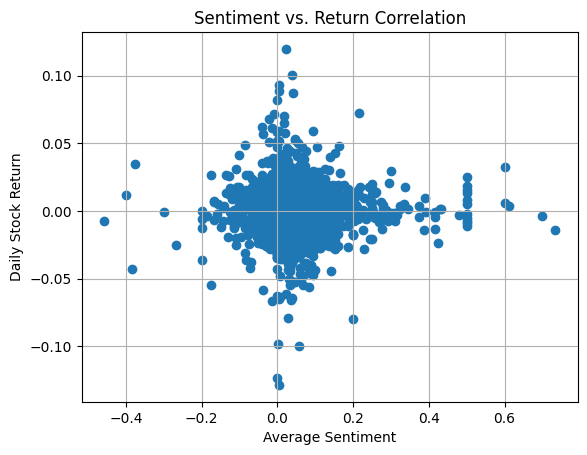

In [13]:
plt.scatter(merged_df['avg_sentiment'], merged_df['daily_return'])
plt.xlabel("Average Sentiment")
plt.ylabel("Daily Stock Return")
plt.title("Sentiment vs. Return Correlation")
plt.grid(True)
plt.show()